In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.ticker as ticker

In [2]:
#Spotify API credentials from .env
load_dotenv()
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

In [3]:
#Initialize Spotify with the credentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [4]:
#Artist IDs for Oliver Heldens and Hi-Lo
oliver_heldens_id = '5nki7yRhxgM509M5ADlN1p'
hi_lo_id = '0ETJQforv5OXgDgidQv9qd'

#Retrieve artist information
def get_artist_info(artist_id):
    artist = sp.artist(artist_id)
    return {
        'name': artist['name'],
        'followers': artist['followers']['total'],
        'popularity': artist['popularity']
    }

In [5]:
# Retrieve top tracks for an artist
def get_top_tracks(artist_id):
    top_tracks = sp.artist_top_tracks(artist_id)
    tracks = []
    for track in top_tracks['tracks']:
        tracks.append({
            'name': track['name'],
            'popularity': track['popularity']
        })
    return tracks

In [6]:
#Compare artists' information
def compare_artists(oliver_info, hi_lo_info):
    print("Comparing Popularity and Followers:")
    print(f"Oliver Heldens - Followers: {oliver_info['followers']}, Popularity: {oliver_info['popularity']}")
    print(f"Hi-Lo - Followers: {hi_lo_info['followers']}, Popularity: {hi_lo_info['popularity']}")

    oliver_tracks = get_top_tracks(oliver_heldens_id)
    hi_lo_tracks = get_top_tracks(hi_lo_id)

    print("\nComparing Top Tracks:")
    print("Oliver Heldens - Top Tracks:")
    for track in oliver_tracks:
        print(f"{track['name']} - Popularity: {track['popularity']}")
 

    print("\nHi-Lo - Top Tracks:")
    for track in hi_lo_tracks:
        print(f"{track['name']} - Popularity: {track['popularity']}")   

In [7]:
#Retrieve and compare artist information
oliver_info = get_artist_info(oliver_heldens_id)
hi_lo_info = get_artist_info(hi_lo_id)
compare_artists(oliver_info, hi_lo_info)

Comparing Popularity and Followers:
Oliver Heldens - Followers: 1012184, Popularity: 67
Hi-Lo - Followers: 128475, Popularity: 54

Comparing Top Tracks:
Oliver Heldens - Top Tracks:
I Was Made For Lovin' You (feat. Nile Rodgers & House Gospel Choir) - Popularity: 73
Turn Me On (feat. Vula) - Popularity: 73
Gecko (Overdrive) - Radio Edit - Popularity: 69
Mas Que Nada - Popularity: 68
Ferrari - Oliver Heldens Remix - Popularity: 66
Out of Love - Popularity: 63
10 Out Of 10 (feat. Kylie Minogue) - Popularity: 59
Can't Stop Playing (Makes Me High) [feat. Ane Brun] - Oliver Heldens & Gregor Salto Vocal Mix Edit - Popularity: 56
Mercury - Popularity: 60
This Groove - Popularity: 59

Hi-Lo - Top Tracks:
Mercury - Popularity: 60
ORION - Popularity: 60
Kronos - Original Mix - Popularity: 59
RIDE OR DIE - Popularity: 56
SUBMARINE - Popularity: 55
GENESIS - Popularity: 54
Flying Octopus - Popularity: 54
WANNA GO BANG - Popularity: 52
BONZAI - Popularity: 52
Skyscrapers - Hi-Lo Remix - Popularity:

In [8]:
#Create a DataFrame for top tracks data
oliver_tracks_df = pd.DataFrame(get_top_tracks(oliver_heldens_id))
hi_lo_tracks_df = pd.DataFrame(get_top_tracks(hi_lo_id))

oliver_tracks_df['artist'] = 'Oliver Heldens'
hi_lo_tracks_df['artist'] = 'Hi-Lo'

#Combine the DataFrames
combined_df = pd.concat([oliver_tracks_df, hi_lo_tracks_df], ignore_index=True)

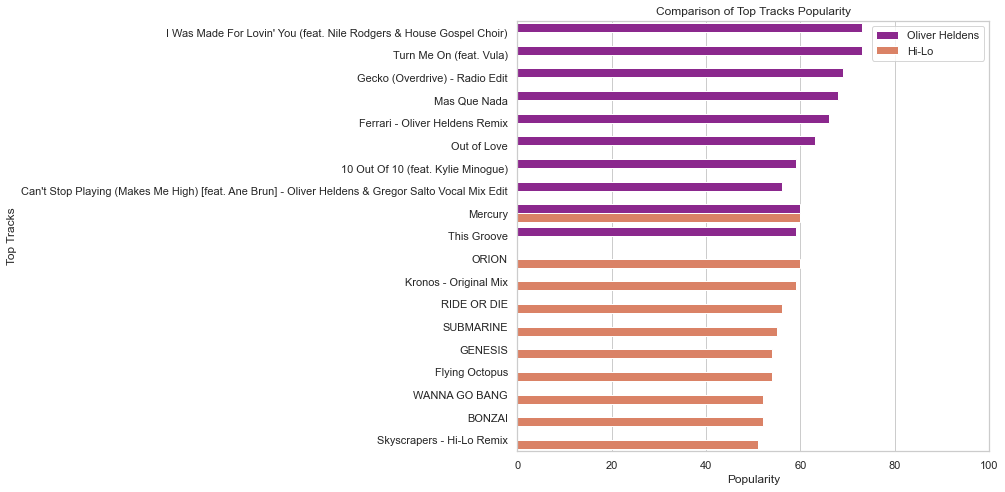

In [9]:
#Set up Seaborn style
sns.set(style="whitegrid")

#Create a bar plot for comparing top tracks popularity
plt.figure(figsize=(14, 7))
sns.barplot(x="popularity", y="name", hue='artist', data=combined_df, palette="plasma")
plt.xlabel('Popularity')
plt.ylabel('Top Tracks')
plt.title('Comparison of Top Tracks Popularity')
plt.tight_layout()
plt.legend()
plt.xlim(0, 100)
plt.show()

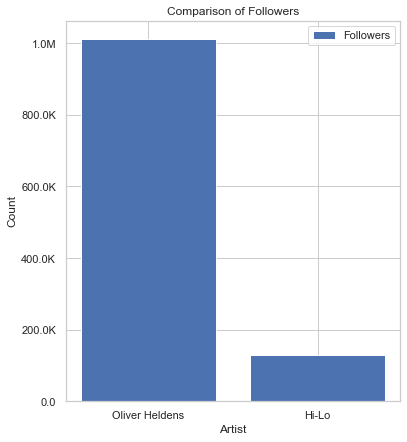

In [10]:
#Create a bar plot for comparing followers 
#Create a custom formatter function to adjust the y-axis 
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value*1e-6}M'
    elif value >= 1e3:
        return f'{value*1e-3}K'
    else:
        return f'{value}'

#Create a FuncFormatter object
formatter = ticker.FuncFormatter(format_ticks)

plt.figure(figsize=(6, 7))
plt.bar(['Oliver Heldens', 'Hi-Lo'], [oliver_info['followers'], hi_lo_info['followers']], color='b', label='Followers')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Comparison of Followers')
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

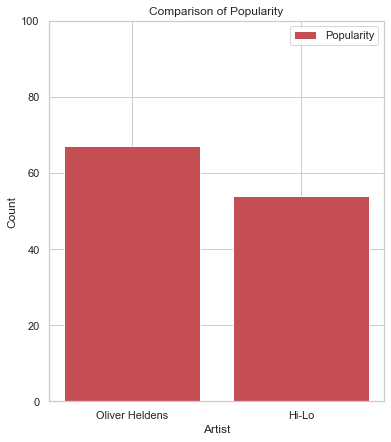

In [11]:
#Create a bar plot for comparing popularity 
plt.figure(figsize=(6, 7))
plt.bar(['Oliver Heldens', 'Hi-Lo'], [oliver_info['popularity'], hi_lo_info['popularity']], color='r', label='Popularity')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Comparison of Popularity')
plt.legend()
plt.ylim(0, 100)
plt.show()